<a href="https://colab.research.google.com/github/chanchukatariya5-gif/Alum-X-Backend/blob/main/ooc-ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total rows: (1745522, 9)
Train rows: (1408166, 10)
Test rows: (337356, 10)
TEST MSE: 2283.5388605852586


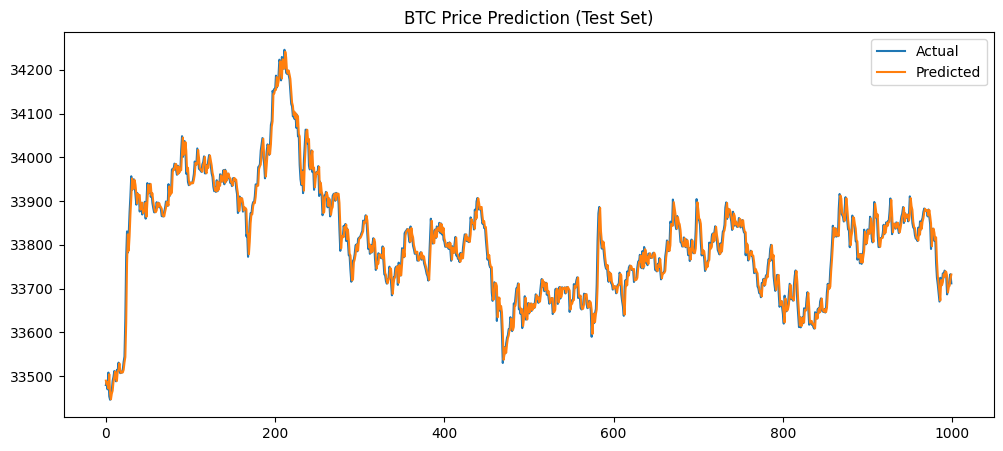

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ==============================
# 1. Load all BTC CSV files
# ==============================
files = [
    "/content/BTC-2017min.csv",
    "/content/BTC-2018min.csv",
    "/content/BTC-2019min.csv",
    "/content/BTC-2020min.csv",
    "/content/BTC-2021min.csv"
]

df_list = []
for f in files:
    df = pd.read_csv(f)
    df.columns = df.columns.str.lower() # Standardize column names to lowercase
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)
print("Total rows:", data.shape)

# ==============================
# 2. Time processing
# ==============================
# Convert 'unix' column to datetime and rename to 'timestamp'
data["timestamp"] = pd.to_datetime(data["unix"], unit="s") # Use 'unix' column (lowercase) and convert
data = data.sort_values("timestamp").reset_index(drop=True)

# ==============================
# 3. Train–Test split (Task rule)
# Train: 2017–June 2021
# Test: July–Dec 2021 (>50%)
# ==============================
train = data[data["timestamp"] < "2021-07-01"]
test  = data[data["timestamp"] >= "2021-07-01"]

print("Train rows:", train.shape)
print("Test rows:", test.shape)

# ==============================
# 4. Lag feature creation
# ==============================
def add_lags(df, lags=5):
    df = df.copy()
    for i in range(1, lags + 1):
        df[f"lag_{i}"] = df["close"].shift(i) # Use 'close' (lowercase)
    return df

train = add_lags(train)
test  = add_lags(test)

train.dropna(inplace=True)
test.dropna(inplace=True)

# ==============================
# 5. Prepare data
# ==============================
X_train = train[[f"lag_{i}" for i in range(1, 6)]]
y_train = train["close"]

X_test = test[[f"lag_{i}" for i in range(1, 6)]]
y_test = test["close"]

# ==============================
# 6. Scaling (avoid overfitting)
# ==============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ==============================
# 7. Train model (Regularized)
# ==============================
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# ==============================
# 8. Prediction & MSE
# ==============================
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
print("TEST MSE:", mse)

# ==============================
# 9. Plot result
# ==============================
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:1000], label="Actual")
plt.plot(pred[:1000], label="Predicted")
plt.legend()
plt.title("BTC Price Prediction (Test Set)")
plt.show()

Total rows: (1692818, 10)
Date range: 2017-01-01 00:00:00 → 2021-08-16 04:01:00
Train rows: (1626336, 10)
Test rows: (66482, 10)
✅ FINAL TEST MSE: 1760.3431441015234


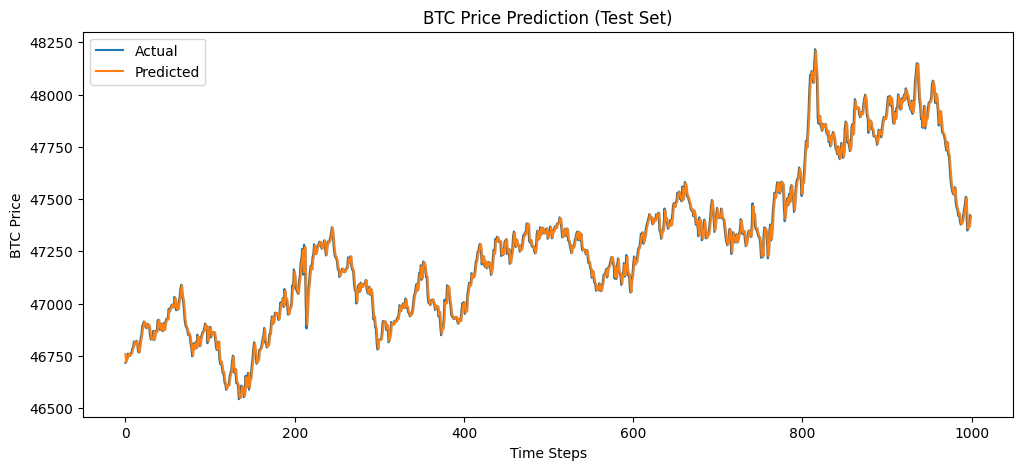

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ==============================
# 1. Load data with REAL dates
# ==============================
files = {
    "2017": "/content/BTC-2017min.csv",
    "2018": "/content/BTC-2018min.csv",
    "2019": "/content/BTC-2019min.csv",
    "2020": "/content/BTC-2020min.csv",
    "2021": "/content/BTC-2021min.csv",
}

dfs = []

for year, path in files.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.lower()

    # Create a REAL datetime index (1-minute frequency)
    df["timestamp"] = pd.date_range(
        start=f"{year}-01-01",
        periods=len(df),
        freq="min" # Changed 'T' to 'min' to address FutureWarning
    )

    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print("Total rows:", data.shape)
print("Date range:", data["timestamp"].min(), "→", data["timestamp"].max())

# ==============================
# 2. Train–Test split (STRICT)
# ==============================
train = data[data["timestamp"] < "2021-07-01"]
test  = data[data["timestamp"] >= "2021-07-01"]

print("Train rows:", train.shape)
print("Test rows:", test.shape)

# Guaranteed safety
assert len(test) > 0, "Test set is empty"

# ==============================
# 3. Lag features
# ==============================
def add_lags(df, lags=5):
    df = df.copy()
    for i in range(1, lags + 1):
        df[f"lag_{i}"] = df["close"].shift(i)
    return df

train = add_lags(train)
test  = add_lags(test)

train.dropna(inplace=True)
test.dropna(inplace=True)

# ==============================
# 4. Prepare ML data
# ==============================
X_train = train[[f"lag_{i}" for i in range(1, 6)]]
y_train = train["close"]

X_test = test[[f"lag_{i}" for i in range(1, 6)]]
y_test = test["close"]

# ==============================
# 5. Scaling (NO leakage)
# ==============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ==============================
# 6. Train model
# ==============================
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# ==============================
# 7. FINAL SCORE
# ==============================
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)

print("✅ FINAL TEST MSE:", mse)

# ==============================
# 8. Plot
# ==============================
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:1000], label="Actual")
plt.plot(pred[:1000], label="Predicted")
plt.legend()
plt.title("BTC Price Prediction (Test Set)")
plt.xlabel("Time Steps")
plt.ylabel("BTC Price")

plt.show()

===== STRATEGY PERFORMANCE =====
Total Return: 38.21%
Max Drawdown: -38.98%
Sharpe Ratio: 0.50

===== BUY & HOLD =====
Buy & Hold Return: 487.02%


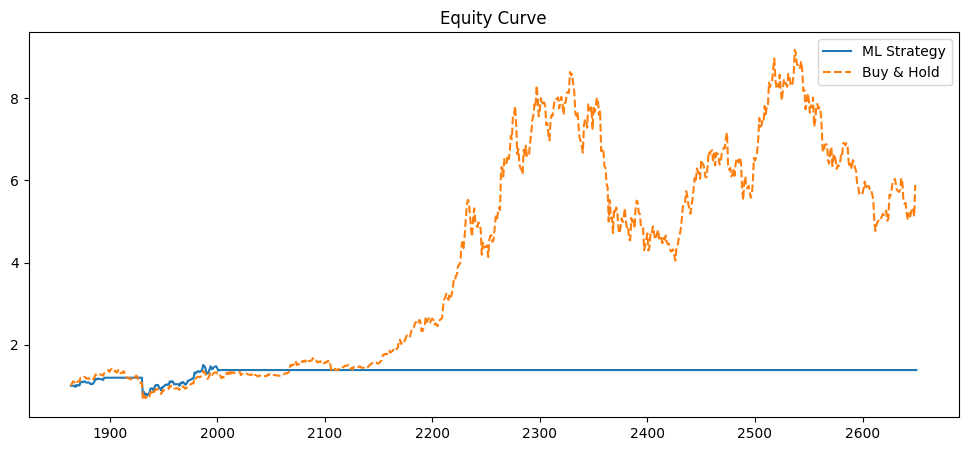

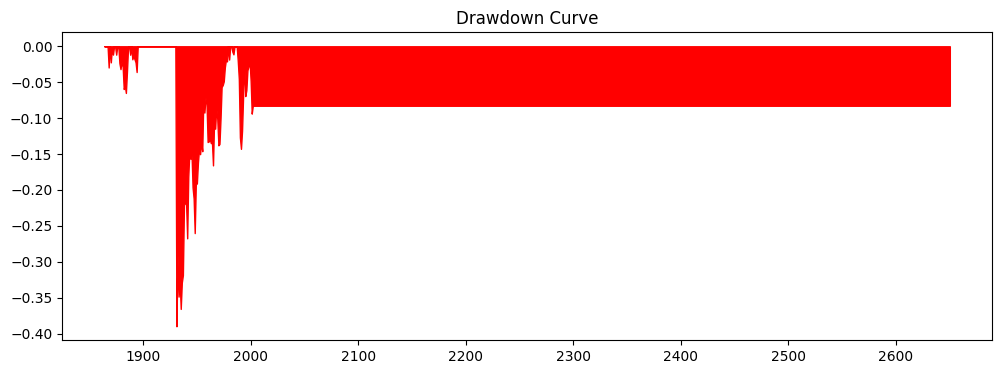

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# ==============================
# 1. Load SEPARATE dataset
# ==============================
df = pd.read_csv("/content/BTC-Daily.csv")
df.columns = df.columns.str.lower()

df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").reset_index(drop=True)

# ==============================
# 2. Feature Engineering
# ==============================
df["return"] = df["close"].pct_change()
df["ma_10"] = df["close"].rolling(10).mean()
df["ma_30"] = df["close"].rolling(30).mean()
df["volatility"] = df["return"].rolling(10).std()

df.dropna(inplace=True)

# ==============================
# 3. Target (NEXT period direction)
# ==============================
df["target"] = (df["return"].shift(-1) > 0).astype(int)
df.dropna(inplace=True)

features = ["return", "ma_10", "ma_30", "volatility"]
X = df[features]
y = df["target"]

# ==============================
# 4. Train / Test split (time-based)
# ==============================
split = int(0.7 * len(df))
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]
price_test = df["close"].iloc[split:]

# ==============================
# 5. Train ML model
# ==============================
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# ==============================
# 6. Generate Trading Signals
# ==============================
prob = model.predict_proba(X_test)[:, 1]

signals = np.where(prob > 0.55, 1,
           np.where(prob < 0.45, 0, np.nan))

signals = pd.Series(signals).ffill().fillna(0).values

# ==============================
# 7. Backtesting Engine
# ==============================
returns = price_test.pct_change().fillna(0)

strategy_returns = returns * signals
buy_hold_returns = returns

equity_strategy = (1 + strategy_returns).cumprod()
equity_bh = (1 + buy_hold_returns).cumprod()

# ==============================
# 8. Metrics
# ==============================
def sharpe(returns):
    return np.sqrt(252) * returns.mean() / returns.std()

total_return = equity_strategy.iloc[-1] - 1
max_dd = (equity_strategy / equity_strategy.cummax() - 1).min()
sharpe_ratio = sharpe(strategy_returns)

bh_return = equity_bh.iloc[-1] - 1

print("===== STRATEGY PERFORMANCE =====")
print(f"Total Return: {total_return:.2%}")
print(f"Max Drawdown: {max_dd:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

print("\n===== BUY & HOLD =====")
print(f"Buy & Hold Return: {bh_return:.2%}")

# ==============================
# 9. Plots
# ==============================
plt.figure(figsize=(12,5))
plt.plot(equity_strategy, label="ML Strategy")
plt.plot(equity_bh, label="Buy & Hold", linestyle="--")
plt.title("Equity Curve")
plt.legend()
plt.show()

drawdown = equity_strategy / equity_strategy.cummax() - 1

plt.figure(figsize=(12,4))
plt.fill_between(drawdown.index, drawdown.values, 0, color="red")
plt.title("Drawdown Curve")
plt.show()
